In [ ]:
!pip install transformers
!pip install tensorflow_addons

     |████████████████████████████████| 3.5 MB 5.5 MB/s 
     |████████████████████████████████| 895 kB 38.6 MB/s 
     |████████████████████████████████| 6.8 MB 37.0 MB/s 
     |████████████████████████████████| 596 kB 34.9 MB/s 
     |████████████████████████████████| 67 kB 2.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
from google.colab import drive
import pickle
from transformers import BertTokenizer, TFAutoModel, AlbertTokenizerFast, TFBertModel
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_loc = './drive/MyDrive/'
with open(f'/content/drive/MyDrive/Token_Data.pkl', 'rb' ) as f:
  X, y, tok, embedding_matrix = pickle.load(f)

In [ ]:
y = y.tolist()

for i in range(len(y)):
    for n in range(len(y[i])):
        summer = np.array(y[i][n]).sum()
        if summer == 0:
            new = 1
        else:
            new = 0
        y[i][n].append(new)
y = np.array(y)

In [ ]:
#Masking not working
"""X = X.tolist()
new_X = []
for i in range(len(X)):
  Xer = np.array(X[i])
  Xer = Xer[Xer!=0]
  new_X.append(Xer)
X = np.array(new_X)
del new_X"""

'X = X.tolist()\nnew_X = []\nfor i in range(len(X)):\n  Xer = np.array(X[i])\n  Xer = Xer[Xer!=0]\n  new_X.append(Xer)\nX = np.array(new_X)\ndel new_X'

In [ ]:
max_length = 1000
split = 0.75

X_train = X[:int(len(X)*split)]
y_train = y[:int(len(y)*split)]

X_test = X[int(len(X)*split):]
y_test = y[int(len(y)*split):]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, SimpleRNN, RNN, GRU
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from tensorflow.keras.optimizers import Adam

def create_model():

  model = Sequential()
  model.add(Embedding(len(embedding_matrix), 300, weights=[embedding_matrix], input_length=max_length, trainable=False))#, mask_zero=True))
  model.add(Bidirectional(LSTM(500, return_sequences=True)))#Bidirectional()
  model.add(Dropout(0.5))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(y.shape[2], activation='softmax'))
  opt = Adam()

  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

  return model

In [ ]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.TPUStrategy(tpu)

# Create model
with strategy.scope():
    model = create_model()

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.9.194.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.9.194.114:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         3050700   
                                                                 
 bidirectional (Bidirectiona  (None, 1000, 1000)       3204000   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1000, 1000)        0         
                                                                 
 dense (Dense)               (None, 1000, 6)           6006      
                                                                 
Total params: 6,260,706
Trainable params: 3,210,006
Non-trainable params: 3,050,700
_________________________________________________________________


In [ ]:
import time

iter = 10
best_model_val = 0
checkpoint_dir = checkpoint_dir = f'{drive_loc}/GLOVE_NER_LSTM'

#Saving models differently as there was consistent implementation error with google drive

model_1_vals = {}

for i in range(iter):
  print(f'Iteration: {i}')
  history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 1,
                    batch_size=6,
                    verbose=1
                    )
  model_val = history.history['val_accuracy'][0]
  if model_val > best_model_val:
    try:
      model.save_weights(f'{checkpoint_dir}.h5')
      best_model_val = model_val
    except:
      time.sleep(5)
      model.save_weights(f'{checkpoint_dir}.h5')
      best_model_val = model_val

  
  for key in history.history.keys():
    if key not in model_1_vals:
      model_1_vals[key] = []
    model_1_vals[key].append(history.history[key][0])

model.load_weights(f'{checkpoint_dir}.h5')

Iteration: 0
Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


50/50 [==============================] - 27s 358ms/step - loss: 0.4506 - accuracy: 0.9086 - val_loss: 0.2101 - val_accuracy: 0.9399
Iteration: 1
50/50 [==============================] - 15s 300ms/step - loss: 0.2344 - accuracy: 0.9294 - val_loss: 0.1873 - val_accuracy: 0.9428
Iteration: 2
50/50 [==============================] - 15s 308ms/step - loss: 0.2112 - accuracy: 0.9330 - val_loss: 0.1789 - val_accuracy: 0.9463
Iteration: 3
50/50 [==============================] - 15s 300ms/step - loss: 0.2029 - accuracy: 0.9363 - val_loss: 0.1713 - val_accuracy: 0.9481
Iteration: 4
50/50 [==============================] - 15s 301ms/step - loss: 0.1902 - accuracy: 0.9389 - val_loss: 0.1820 - val_accuracy: 0.9423
Iteration: 5
50/50 [==============================] - 15s 300ms/step - loss: 0.1841 - accuracy: 0.9389 - val_loss: 0.1723 - val_accuracy: 0.9457
Iteration: 6
50/50 [==============================] - 15s 299ms/step - loss: 0.1825 - accuracy: 0.9398 - val_loss: 0.1648 - val_accuracy: 0.949

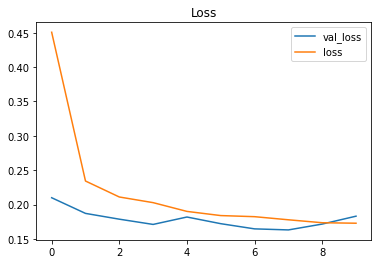

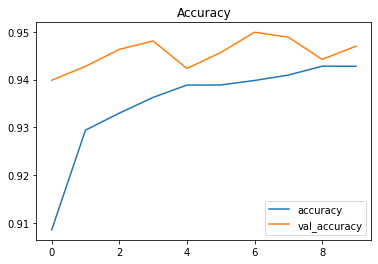

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_1_vals['val_loss'])
plt.plot(model_1_vals['loss'])
plt.legend(['val_loss', 'loss'])
plt.title('Loss')
plt.show()

plt.plot(model_1_vals['accuracy'])
plt.plot(model_1_vals['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()

In [ ]:
import copy
def get_entities(text, out, prob):
  output = copy.copy(out)
  output[output> prob] = 1
  output[output<= prob] = 0

  identified = []

  entity_loc = {
    2:["Reason", False, []],
    1:["Defendant",False, []],
    3:["Penalties", False, []],
    4:["Outcome", False, []],
    0:["Platiff", False, []]
  }

  for i in range(0, len(output)):
      word = text[i]
      for n in range(5):
          open = entity_loc[n][1]
          val = output[i, n]
          if open == True:
              if val == 1:
                  entity_loc[n][2].append(word)
              else:
                  entity_loc[n][1] = False
                  identified.append([entity_loc[n][0], tok.sequences_to_texts([entity_loc[n][2]])])
                  entity_loc[n][2] = []
          else:
              if val == 1:
                  entity_loc[n][2].append(word)
                  entity_loc[n][1] = True

  return identified

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[2][0]

array([0.00391591, 0.01119875, 0.03824417, 0.0015139 , 0.00520707,
       0.9399201 ], dtype=float32)

In [ ]:
get_entities(X_test[12], predictions[12], 0.5)

[['Outcome', ['cleared']],
 ['Defendant', ['exxon mobil corp']],
 ['Reason',
  ['the oil company for decades concealed its knowledge of the role fossil fuels']],
 ['Reason', ['misled']],
 ['Defendant', ['exxon']],
 ['Defendant', ['exxon']],
 ['Defendant', ['exxon']],
 ['Reason', ['systematic scheme']],
 ['Reason', ['investors']],
 ['Defendant', ['exxon']],
 ['Defendant', ['exxon']],
 ['Defendant', ['exxon']],
 ['Defendant', ['mobil']],
 ['Defendant', ['exxon']]]

In [ ]:
entity_diction = {
    "Platiff":0,
    "Defendant":1,
    "Reason":2,
    "Penalties":3,
    "Outcome":4,
    "No-Tag":5
}

metrics = {
    
}

predictions = model.predict(X_test)

predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

for key in entity_diction.keys():
  val = entity_diction[key]
  metrics[key] = {'Pred':[],
                  'Actual':[]
                  }
  for i in range(len(X_test)):
    for n in range(len(X_test[i])):
        mask = X_test[i][n]
        if mask != 0:
            metrics[key]['Pred'].append(predictions[i][n][val])
            metrics[key]['Actual'].append(y_test[i][n][val])


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

outputer = {'Label':[],
            'Accuracy':[],
            'Precision':[],
            'Recall':[],
            'F1 Score':[]}

for key in metrics.keys():
    outputer['Label'].append(key)
    outputer['Accuracy'].append(accuracy_score(metrics[key]['Actual'], metrics[key]['Pred']))
    outputer['Precision'].append(precision_score(metrics[key]['Actual'], metrics[key]['Pred']))
    outputer['Recall'].append(recall_score(metrics[key]['Actual'], metrics[key]['Pred']))
    outputer['F1 Score'].append(f1_score(metrics[key]['Actual'], metrics[key]['Pred']))

In [ ]:
import pandas as pd
pd.DataFrame(outputer, columns=['Label', 'Accuracy','Precision', 'Recall', 'F1 Score'])

,Label,Accuracy,Precision,Recall,F1 Score
0,Platiff,0.975721,0.634518,0.146714,0.238322
1,Defendant,0.974232,0.704965,0.437115,0.539631
2,Reason,0.919171,0.754039,0.260384,0.387097
3,Penalties,0.996961,0.596154,0.281818,0.382716
4,Outcome,0.965845,0.577406,0.118863,0.197143
5,No-Tag,0.856240,0.876398,0.958699,0.915703
